In [1]:
import tensorflow as tf
print(tf.__version__)

2023-04-03 10:25:52.990313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-03 10:25:53.400267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-03 10:25:53.402042: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 10:25:55.248276: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [13]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
train_images[0].ndim

2

In [6]:
train_images[0].shape

(28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels[0]

5

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype("float32")/255
test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

### Listing 2.5 Preparing the Labels

In [14]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2023-04-03 10:49:15.306812: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 6s 11ms/step - loss: 0.2629 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1068 - accuracy: 0.9677
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0711 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0507 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0384 - accuracy: 0.9884


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc=', test_acc)

2023-04-03 10:53:20.801713: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9784
test_acc= 0.9783999919891357


In [17]:
network.predict(test_images)[0]

 19/313 [>.............................] - ETA: 0s 

2023-04-03 10:55:10.115685: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


array([6.5942817e-07, 4.2082483e-08, 2.7057742e-05, 5.3845625e-04,
       6.9551209e-12, 2.4128539e-08, 4.6303352e-12, 9.9942863e-01,
       7.5390687e-07, 4.3024647e-06], dtype=float32)

In [18]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_images.ndim)
print(train_images.dtype)

(60000, 28, 28)
3
uint8


In [22]:
digit = train_images[5]

In [20]:
import matplotlib.pyplot as plt

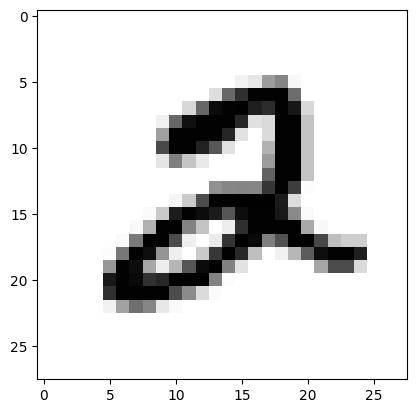

In [23]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
train_labels[5]

2